# Steam Engagement Thesis

## Week 1 - Dataset Inspection

### 1. Load and Inspect the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("games.csv")

df.shape
df.columns
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 122611 entries, 2539430 to 4141790
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       122610 non-null  object 
 1   Name                        122611 non-null  object 
 2   Release date                122611 non-null  object 
 3   Estimated owners            122611 non-null  int64  
 4   Peak CCU                    122611 non-null  int64  
 5   Required age                122611 non-null  float64
 6   Price                       122611 non-null  int64  
 7   DiscountDLC count           122611 non-null  int64  
 8   About the game              114162 non-null  object 
 9   Supported languages         122611 non-null  object 
 10  Full audio languages        122611 non-null  object 
 11  Reviews                     12070 non-null   object 
 12  Header image                122530 non-null  object 
 13  Website     

,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Movies
count,1.226110e+05,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,1.226110e+05,1.226110e+05,40.000000,122611.000000,1.226110e+05,1.226110e+05,122611.000000,1.226110e+05,122611.000000,0.0
mean,5.459332e+01,0.167611,4.765091,18.353663,0.545856,2.564941,0.024549,1.044986e+03,1.691974e+02,99.175000,18.087015,9.618250e+02,2.080232e+02,13.789268,1.735705e+02,14.722170,NaN
std,3.729452e+03,1.653591,12.531030,28.858970,14.516026,13.660559,1.394901,2.809173e+04,5.374645e+03,0.675107,141.493879,2.187880e+04,1.121768e+04,270.378053,1.120254e+04,294.509615,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,98.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000e+00,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,99.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
50%,0.000000e+00,0.000000,2.240000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000e+00,99.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
75%,0.000000e+00,0.000000,5.240000,40.000000,0.000000,0.000000,0.000000,3.700000e+01,1.000000e+01,100.000000,19.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
max,1.013936e+06,21.000000,999.980000,100.000000,3703.000000,97.000000,100.000000,7.642084e+06,1.173003e+06,100.000000,9821.000000,4.830455e+06,3.429544e+06,20088.000000,3.429544e+06,20088.000000,NaN


In [2]:
print("Dataset Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes.value_counts())

Dataset Shape: (122611, 39)

Column Types:
object     19
int64      14
float64     3
bool        3
Name: count, dtype: int64


### 2. Identify Key Variables

In [3]:
# Clean Column Names
df.columns = df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'discountdlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'],
      dtype='object')

In [4]:
# Automatically identify variable types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("\nCategorical Columns:", categorical_cols)
print("\nBoolean Columns:", bool_cols)

Numeric Columns: ['estimated_owners', 'peak_ccu', 'required_age', 'price', 'discountdlc_count', 'metacritic_score', 'user_score', 'positive', 'negative', 'score_rank', 'achievements', 'recommendations', 'average_playtime_forever', 'average_playtime_two_weeks', 'median_playtime_forever', 'median_playtime_two_weeks', 'movies']

Categorical Columns: ['appid', 'name', 'release_date', 'about_the_game', 'supported_languages', 'full_audio_languages', 'reviews', 'header_image', 'website', 'support_url', 'support_email', 'metacritic_url', 'notes', 'developers', 'publishers', 'categories', 'genres', 'tags', 'screenshots']

Boolean Columns: ['windows', 'mac', 'linux']


In [5]:
# Define engagement variables
early_engagement = [
    "average_playtime_two_weeks",
    "median_playtime_two_weeks"
]

long_term_engagement = [
    "average_playtime_forever",
    "median_playtime_forever"
]

print("Early Engagement Variables:", early_engagement)
print("Long-Term Engagement Variables:", long_term_engagement)

Early Engagement Variables: ['average_playtime_two_weeks', 'median_playtime_two_weeks']
Long-Term Engagement Variables: ['average_playtime_forever', 'median_playtime_forever']


In [6]:
# confirming they exist
for col in early_engagement + long_term_engagement:
    print(col, "exists:", col in df.columns)

average_playtime_two_weeks exists: True
median_playtime_two_weeks exists: True
average_playtime_forever exists: True
median_playtime_forever exists: True


In [7]:
# Define static game attributes
static_attributes = [
    'price',
    'required_age',
    'genres',
    'categories',
    'developers',
    'publishers',
    'windows',
    'mac',
    'linux',
    'metacritic_score',
    'user_score'
]

print("Static Attributes:")
for col in static_attributes:
    print(col, "exists:", col in df.columns)

Static Attributes:
price exists: True
required_age exists: True
genres exists: True
categories exists: True
developers exists: True
publishers exists: True
windows exists: True
mac exists: True
linux exists: True
metacritic_score exists: True
user_score exists: True


In [8]:
# Define early signals beyond playtime
early_signals = [
    'peak_ccu',
    'positive',
    'negative',
    'reccomendations',
    'estimated_owners',
    'achievments'
]

print("Early Signal Variables:")
for col in early_signals:
    print(col, "exists:", col in df.columns)

Early Signal Variables:
peak_ccu exists: True
positive exists: True
negative exists: True
reccomendations exists: False
estimated_owners exists: True
achievments exists: False


### 3. Check Missing Data

In [9]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary

movies                        122611
score_rank                    122571
metacritic_url                118355
reviews                       110541
notes                         100153
website                        72935
support_url                    68469
tags                           39265
support_email                  22263
categories                      8953
publishers                      8909
about_the_game                  8449
developers                      8437
genres                          8413
screenshots                     6018
header_image                      81
appid                              1
mac                                0
linux                              0
release_date                       0
estimated_owners                   0
peak_ccu                           0
required_age                       0
price                              0
discountdlc_count                  0
median_playtime_two_weeks          0
median_playtime_forever            0
a

The core modeling variables have 0 missing variables which is HUGE. It means my dependent variables are complete, core predictors are complete, and I won't lose rows during modeling. As for the junk columns, they are basically unusable.

### 4. Check basic distributions

Text(0.5, 1.0, 'Average Playtime (Two Weeks)')

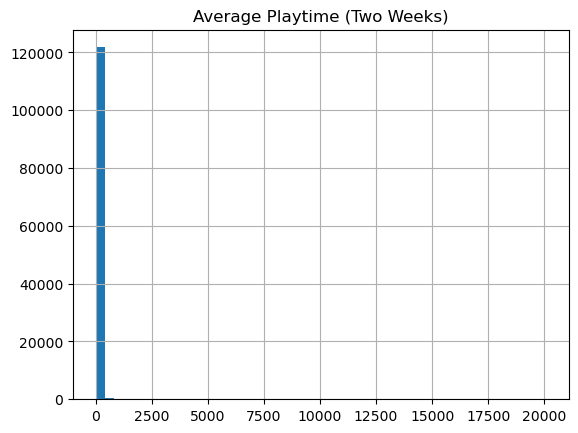

In [10]:
import matplotlib.pyplot as plt

df['average_playtime_two_weeks'].hist(bins=50)
plt.title("Average Playtime (Two Weeks)")

Text(0.5, 1.0, 'Average Playtime (Lifetime)')

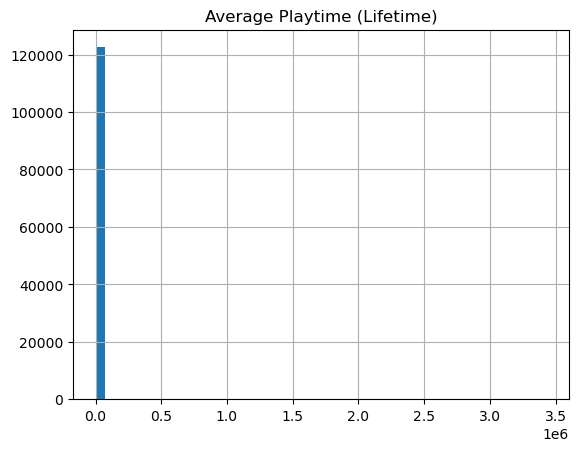

In [11]:
df['average_playtime_forever'].hist(bins=50)
plt.title("Average Playtime (Lifetime)")

The histograms show a massive right skew. Most games have nearly zero early playtime and a few games have enormous lifetime playtime (this was expected). This suggest the use of log tranformation later on.

Text(0.5, 1.0, 'Early vs Lifetime Playtime')

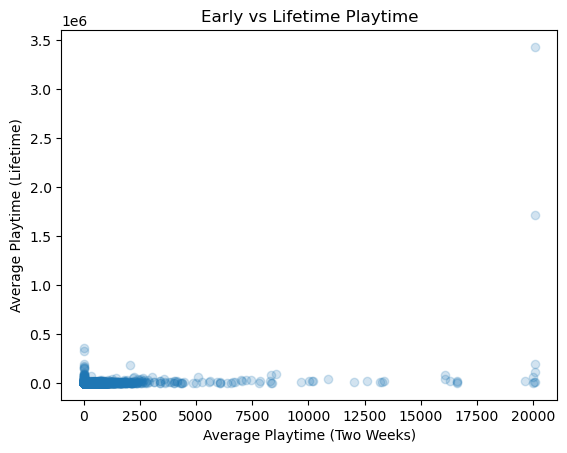

In [12]:
plt.scatter(
    df['average_playtime_two_weeks'],
    df['average_playtime_forever'],
    alpha=0.2
)
plt.xlabel("Average Playtime (Two Weeks)")
plt.ylabel("Average Playtime (Lifetime)")
plt.title("Early vs Lifetime Playtime")

There is dense cluster near zero early playtime, extreme vertical outliers in liftime, and funnel-shaped dispersion.The relationship is non linear because of many low early / low lifetime games and a few extreme outliers. This reinforces the need for log transformation.

Text(0.5, 1.0, 'Log-Transformed Early vs Lifetime Playtime')

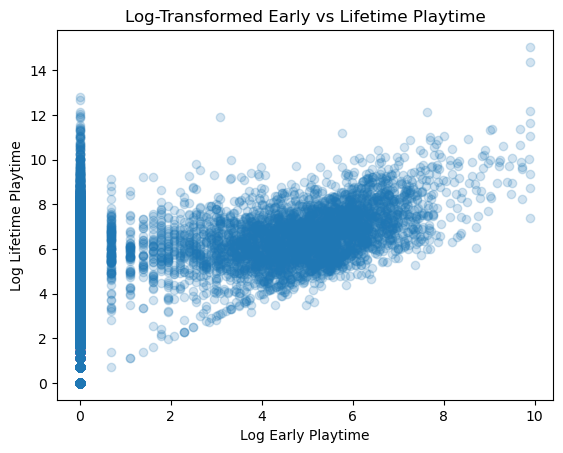

In [13]:
# For insight clarity
import numpy as np

plt.scatter(
    np.log1p(df['average_playtime_two_weeks']),
    np.log1p(df['average_playtime_forever']),
    alpha=0.2
)
plt.xlabel("Log Early Playtime")
plt.ylabel("Log Lifetime Playtime")
plt.title("Log-Transformed Early vs Lifetime Playtime")

### 5. Confirm Hypothesis Feasibility

In [14]:
# test if early engagement correlates with lifetime playtime
df[['average_playtime_two_weeks',
    'average_playtime_forever']].corr()

,average_playtime_two_weeks,average_playtime_forever
average_playtime_two_weeks,1.000000,0.335276
average_playtime_forever,0.335276,1.000000


In [15]:
# test price vs lifetime
df[['price', 'average_playtime_forever']].corr()

,price,average_playtime_forever
price,1.00000,0.00389
average_playtime_forever,0.00389,1.00000


A 0.355 correlation is meaniful and not trivial. It's a good result for my thesis because it suggest early engagement matters, but doesnt explain everything. Other signals likely matter too.

A 0.00389 is effectively zero. This is very interesting because it suggest pricing alone explains almost nothing about long term engagement.

In [16]:
df[['average_playtime_forever', 'median_playtime_forever']].corr()

,average_playtime_forever,median_playtime_forever
average_playtime_forever,1.00000,0.99421
median_playtime_forever,0.99421,1.00000


This is an almost perfect correlation. The average and median playtime are essentially measuring the same signal. The distribution is skewed, but median is not giving a meaningfully different information at the game level.